# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




# Task 1:
# Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
# Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import os
import sys
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
mta= np.load('MTA_Fare.npy')


In [3]:
#!curl -O 'https://github.com/fedhere/PUI2017_fb55/blob/master/HW10_fb55/MTA_Fare.npy'
#os.system("mv MTA_Fare.npy " + os.getenv("PUIDATA"))

In [4]:
#mta = np.load(os.getenv('PUIDATA') + '/MTA_Fare.npy')


In [5]:
mta.shape

(600, 23, 194)

In [6]:
# Creating and storing an array of the 23 different types of the rides 
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [7]:
date = pd.date_range(start = '05/25/2010', end = '02/15/2014', freq = 'w')

In [8]:
# replacing missing values from -1 to nan
mta = mta.astype(float)
mta[mta == -1] = numpy.nan

In [9]:
mta_sum_station = np.nansum(mta, axis =0)
print(mta_sum_station.shape)


(23, 194)


In [10]:
mta_sum_type = np.nansum(mta, axis=1)
print (mta_sum_type.shape)



(600, 194)


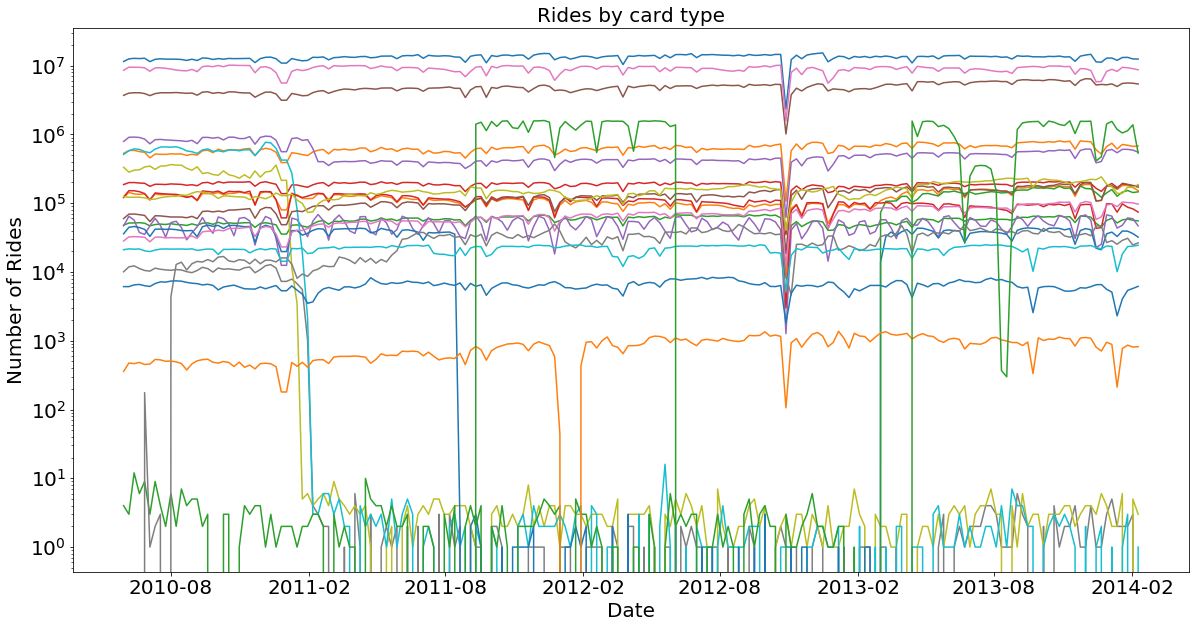

In [11]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for i in range (0, mta_sum_station.shape[0]):
    ax.plot(date, mta_sum_station[i])

ax.set_yscale('log')
pl.tick_params(labelsize=20)
pl.title("Rides by card type", fontsize = 20)
pl.xlabel("Date", fontsize = 20)
pl.ylabel("Number of Rides", fontsize = 20)



**Figure 1** Number of rides by card type 

Figure 1 shows a prominent event, or a drastic drop between 2012-08 & 2013-02. That means, to capture the event I should look for values less than 3 standard deviation from the mean

## Calculating the boundary values for 3 standard deviation from the mean

In [12]:
# create an empty list and append the boundary for each card type 

l = [] 
for i in range (mta_sum_station.shape[0]):
    boundary = [mta_sum_station[i].mean() - 3 * mta_sum_station[i].std()]
    l.append(boundary)

    


In [13]:
l

[[9604845.0579401106],
 [356015.94995861105],
 [33513.590955584688],
 [134434.83319087591],
 [10656.266944750278],
 [2505504.8597569498],
 [5798132.586046855],
 [-10299.731209471227],
 [-283912.78580238583],
 [-564505.59582250973],
 [-36157.738180809843],
 [31000.676319992534],
 [-152715.8819411569],
 [36672.291945988371],
 [8704.7641803158331],
 [7433.1249396702624],
 [3102.9906265655736],
 [-8651.2193583633962],
 [47662.357462271058],
 [12794.797491756037],
 [3319.7215323389883],
 [-114.0811969609066],
 [-1492816.494821473]]

In [14]:
for i in range(mta_sum_station.shape[0]):
    print(np.where(mta_sum_station[i] < l[i]))


(array([126]),)
(array([126]),)
(array([126]),)
(array([126]),)
(array([126]),)
(array([126]),)
(array([ 30,  31, 126, 134]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([126]),)
(array([], dtype=int64),)
(array([126]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([126]),)
(array([ 95, 126, 173, 189]),)
(array([126, 173, 189]),)
(array([], dtype=int64),)
(array([], dtype=int64),)


#  the index of the outlier is 126 as seen above

In [15]:
date[126]

Timestamp('2012-10-28 00:00:00', freq='W-SUN')

## Our outlier turns out to be 28 October 2012, which correspond to Hurricane Sandy

## Task 2:
## Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

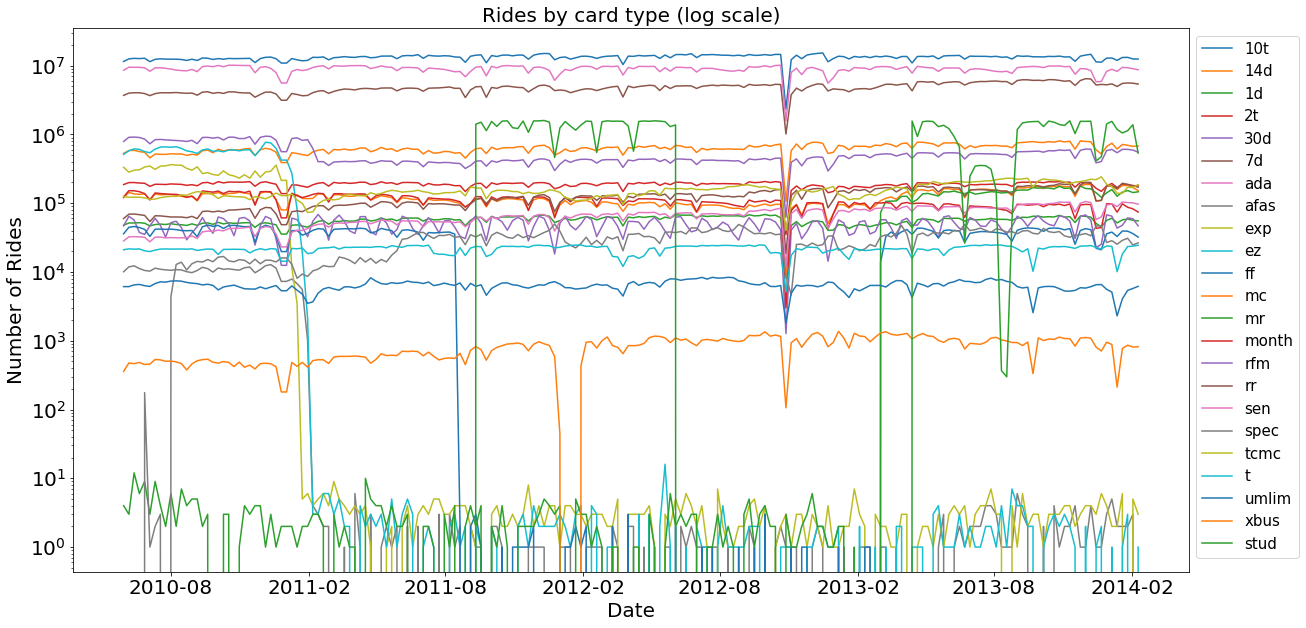

In [16]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for i in range (mta_sum_station.shape[0]):
    ax.plot(date, mta_sum_station[i], label = ridetype[i])

ax.set_yscale('log')
pl.tick_params(labelsize=20)
pl.title("Rides by card type (log scale)", fontsize = 20)
pl.xlabel("Date", fontsize = 20)
pl.ylabel("Number of Rides", fontsize = 20)
pl.legend(loc='best', fontsize=15, bbox_to_anchor=(1.0, 1.0))




**Figure 2**  Number of rides by card type

# PLOT ROLLING MEANS

/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  


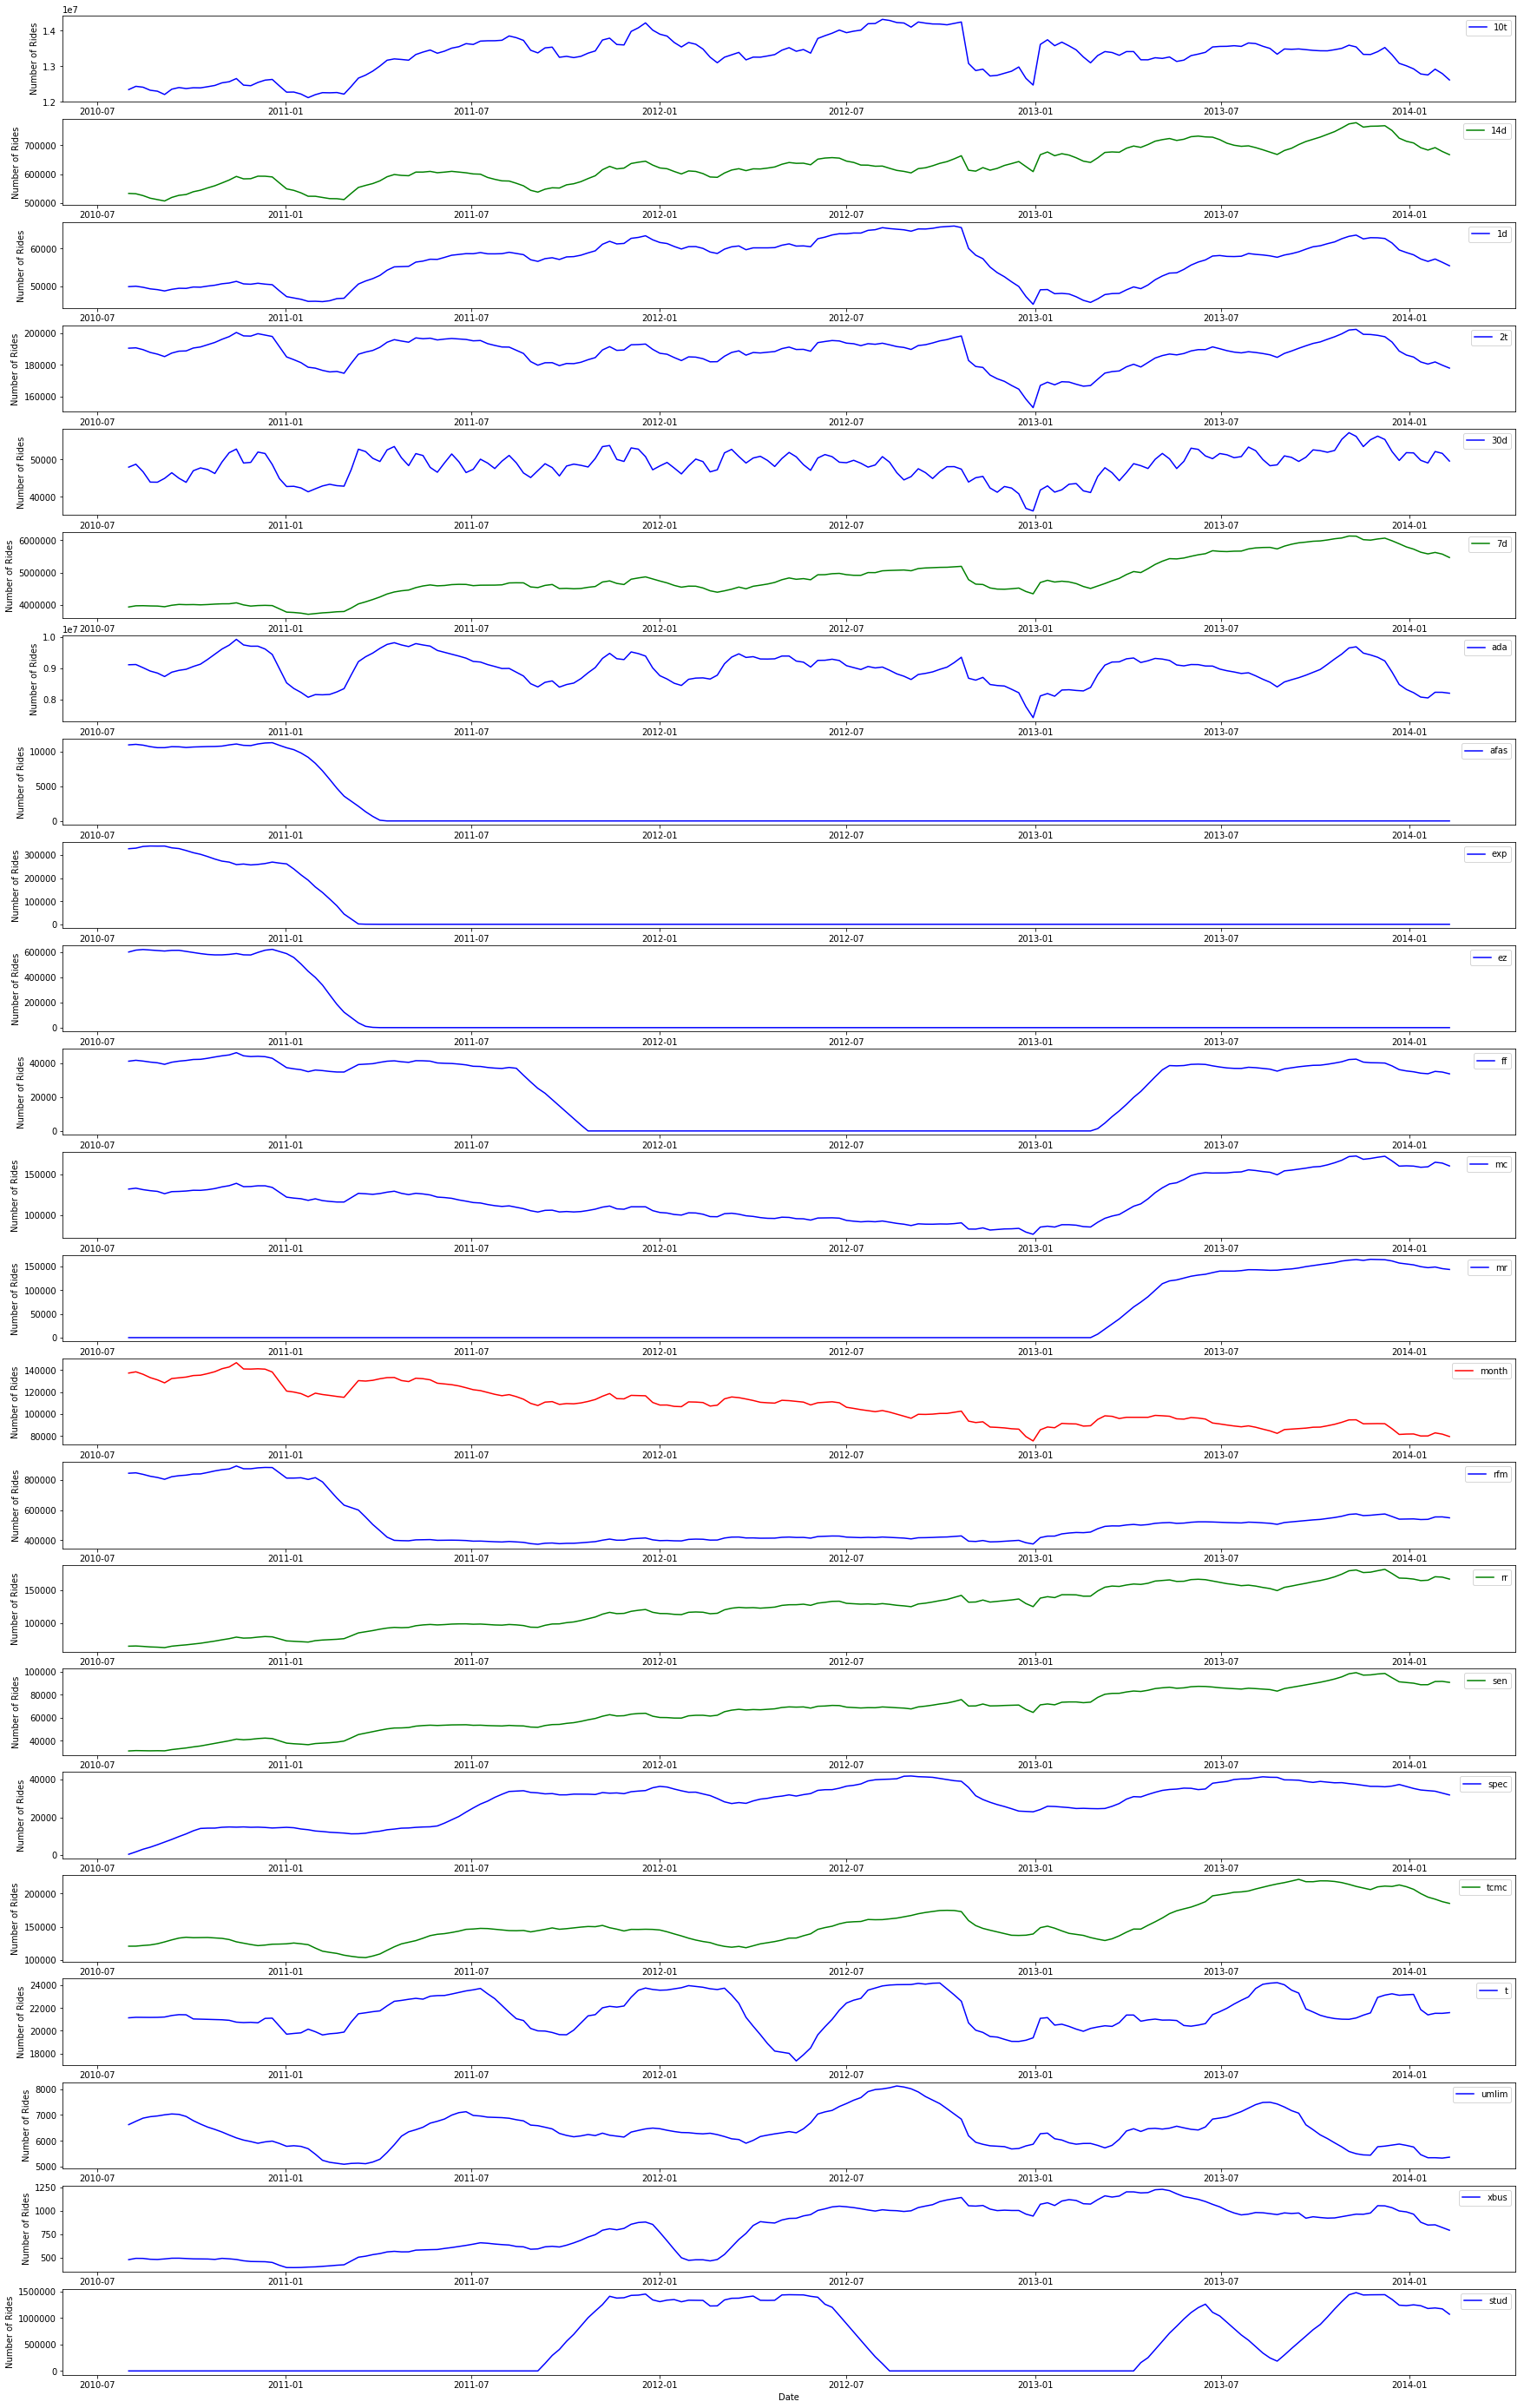

In [17]:
fig, axes = plt.subplots(nrows=23, ncols=1 ,figsize=(30, 50))

for i, ax in enumerate(axes.flatten()):
    if (i == 1 or i == 5 or i == 15 or i == 16 or i ==18):
        ax.plot(date, pd.rolling_mean(mta_sum_station[i], 10), label = ridetype[i], color = 'green')

    elif (i == 13):
        ax.plot(date, pd.rolling_mean(mta_sum_station[i], 10), label = ridetype[i], color = 'red')

    else:
        ax.plot(date, pd.rolling_mean(mta_sum_station[i], 10), label = ridetype[i], color = 'blue')

    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Rides")
    ax.legend()
    
plt.show()
    

**Figure 3** Rolling mean plots of 23 card type. Steadily decreasing trend is shown in red, and steadily increasing trends are shown in green.

## After visual exploration, it seems that 14d, 7d, rr, sen, tcmc are steadily increasing (shown in green line in the figure)
## While month is steadily decreasing (Shown in red in the figure)

## what is the ratio of usage in the first 10 and last 10 weeks

In [18]:
increasing_index = [1, 5, 15, 16,18]
decreasing_index = 13
for it in increasing_index:
    ratio = ((mta_sum_station [it] [-10:].mean()) / (mta_sum_station [it] [:10].mean()))
    print("{}".format(ridetype[it]) + " is  steadily increasing  by %.2f." % ratio)
    
ratio_dec = ((mta_sum_station [decreasing_index] [:10].mean()) / (mta_sum_station [it] [-10:].mean()))
print("{}".format(ridetype[decreasing_index]) + " is  steadily decreasing  by %.2f." % ratio_dec)
    

14d is  steadily increasing  by 1.25.
7d is  steadily increasing  by 1.39.
rr is  steadily increasing  by 2.59.
sen is  steadily increasing  by 2.91.
tcmc is  steadily increasing  by 1.53.
month is  steadily decreasing  by 0.74.


## Task 3:
## Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [19]:
mta_sumtype = pd.DataFrame(mta_sum_type).T
mta_sumtype.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,126878.0,37306.0,6606.0,16378.0,18564.0,19987.0,12449.0,11091.0,10482.0,147187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149477.0,46464.0,6881.0,17408.0,19903.0,20625.0,13644.0,11659.0,11030.0,154826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152383.0,49359.0,7229.0,17595.0,19948.0,21225.0,13719.0,12037.0,10881.0,155958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,160175.0,44849.0,5731.0,14242.0,16076.0,17412.0,11460.0,9809.0,9123.0,154914.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162641.0,41509.0,7032.0,17589.0,20283.0,20909.0,14094.0,11944.0,10923.0,157628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


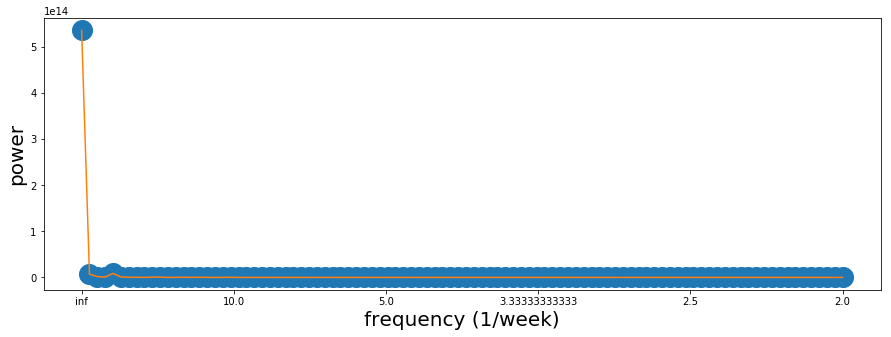

In [20]:
N = len(mta_sumtype)
f = np.abs(np.fft.rfft(mta_sumtype[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0) , (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0) , (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20)

**Figure 4** Power plot of MTA rides 

In [21]:
print (" The first two frequency (slowest) caculated are \n1: infinity (1.0/0) ",
       "and \n2:the frequency corresponding to the entire duration of the series = N*d,"
       " \nand they should be removed because they are uninteresting\n",
       "freq: ", np.fft.rfftfreq(N, 1.0)[0], "= period: ", 1.0/np.fft.rfftfreq(N, 1.0)[0], "and\n",
       "freq: ", np.fft.rfftfreq(N, 1.0)[1], "= period: every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[1]), "weeks\n\n")

print ("The fastest frequency you can calculate id every 1.0/2*d, "
       "called the Nyquist frequency\n",
       np.fft.rfftfreq(N, 1.0)[-1],  "or every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[-1]), "weeks")

 The first two frequency (slowest) caculated are 
1: infinity (1.0/0)  and 
2:the frequency corresponding to the entire duration of the series = N*d, 
and they should be removed because they are uninteresting
 freq:  0.0 = period:  inf and
 freq:  0.00515463917526 = period: every 194.0 weeks


The fastest frequency you can calculate id every 1.0/2*d, called the Nyquist frequency
 0.5 or every 2.0 weeks


/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


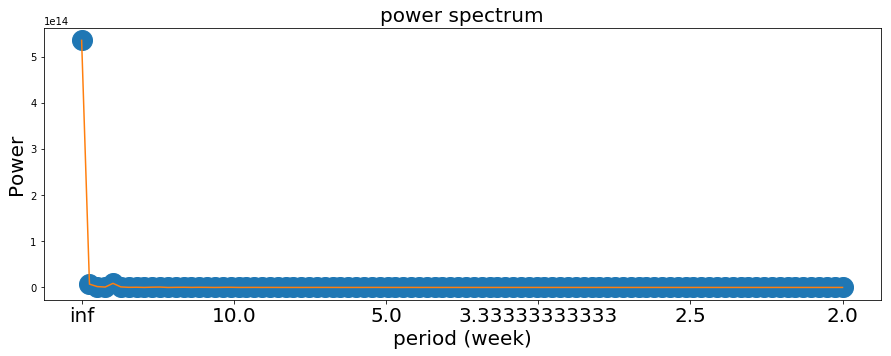

In [22]:
f = np.abs(np.fft.rfft(mta_sum_type[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')

# changing the labels on the x ticks to see the period instead of frequency
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("power spectrum", fontsize=20);

**Figure 5** Power spectrum plot 

Below I need to removing the first entry of the FFT output array because, it is not physically interesting and it is always a very large number. After that I will check if I need to eliminate other entries. Basically, we want to eliminate high values from the power plot to decide on the important peaks.



/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


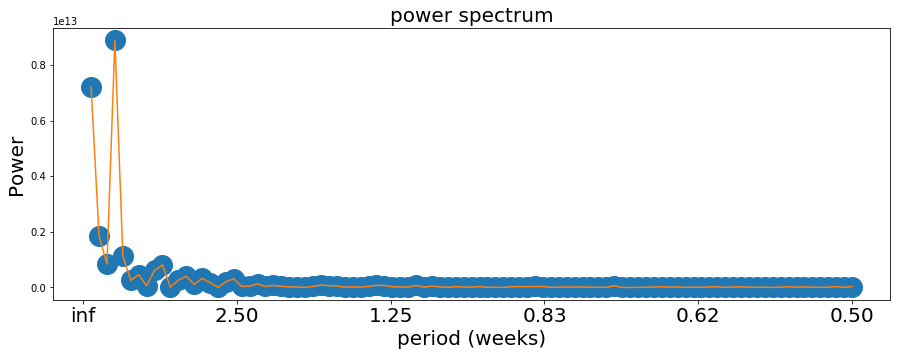

In [23]:
# removing the first entry

f = np.abs(np.fft.rfft(mta_sumtype[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xticklabels([ "%.2f"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("power spectrum", fontsize=20)

**Figure 6** Power spectrum plot with elimination of one entry

## Still there are very large values in the figure above, so I need to eliminate the second largest point now, which means 4 more points should be eliminated.



/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


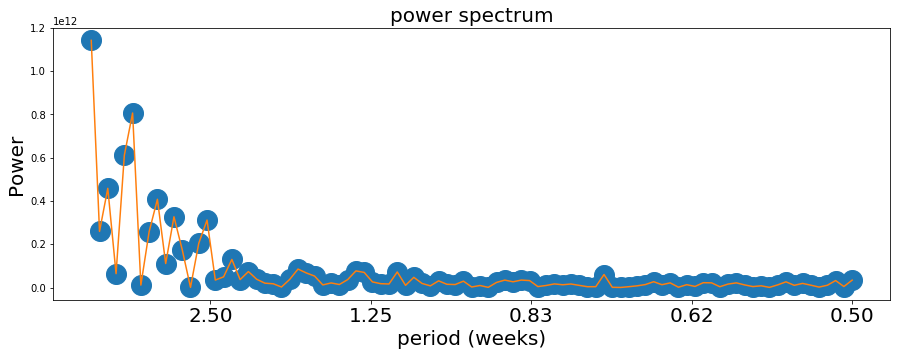

In [24]:
f = np.abs(np.fft.rfft(mta_sumtype[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[5:], (f[5:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[5:], (f[5:]), '-')
ax.set_xticklabels([ "%.2f"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("power spectrum", fontsize=20)

**Figure 7** Power spectrum plot with elimination of four more entry

## now the first entry seem to be really high, so I should also eliminate it 

/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


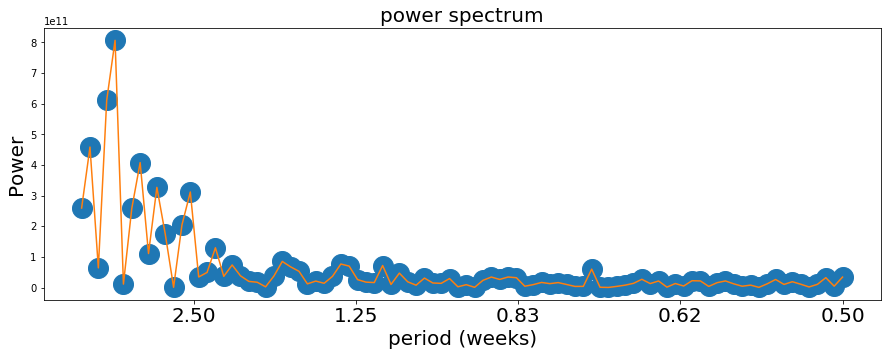

In [25]:
f = np.abs(np.fft.rfft(mta_sumtype[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[6:], (f[6:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[6:], (f[6:]), '-')
ax.set_xticklabels([ "%.2f"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("power spectrum", fontsize=20)

**Figure 8** Power spectrum plot with elimination of one more entry

## Now it seems better, the first entry is not really high this time compared to others.
## The first entry in the plot above is 6th entry now.

## We see from the figure that 10th, 13th 15th and 19th entries are the four most important values

## To verify, now I am finding the indexes of the 4 most important values



In [26]:
np.where(f[6:] == f[6:].max())[0] + 6, np.where(f[11:] == f[11:].max())[0] + 11, \
np.where(f[14:] == f[14:].max())[0] + 14, np.where(f[17:] == f[17:].max())[0] + 17

(array([10]), array([13]), array([15]), array([19]))

In [27]:
print ("most important  periods: ")
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[10]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[13]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[15]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[19]))


most important  periods: 
19.40 weeks
14.92 weeks
12.93 weeks
10.21 weeks


## ASH -20 Marks since you had to find the important station not time period.

# EXTRA CREDIT: Cluster.

In [28]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.cm as cm


In [29]:
tots = mta.transpose(2,0,1).reshape(mta.shape[2], mta.shape[1]*mta.shape[0]).T
tots = tots[tots.std(1)>0]
vals = ((tots.T - tots.mean(1))/tots.std(1)).T


/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [30]:
tots.shape

(7660, 194)

In [31]:
vals.shape

(7660, 194)

In [32]:
km = KMeans(random_state = 12,n_clusters = 10)

In [36]:
label_color_map = {0 : 'b',
                   1 : 'g',
                   2:'r',
                   3:'c',
                   4:'m',
                   5:'y',
                   6:'k',
                   7:'darkblue',
                   8:'orange',
                   9:'darkgreen',
                   10:'black'
                 }
km.fit(vals)  
labels = km.labels_
label_color = [label_color_map[l] for l in labels]


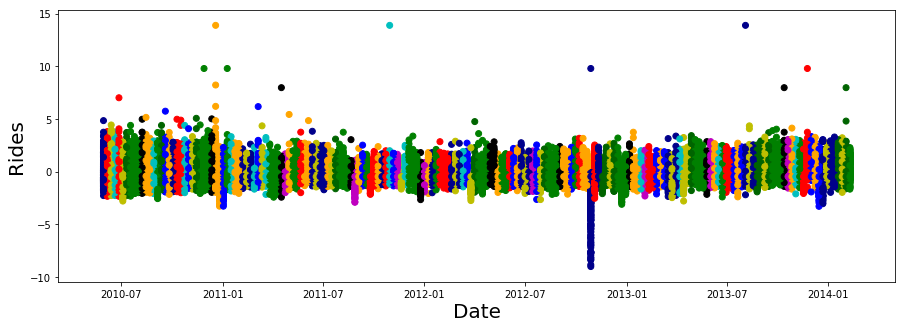

In [39]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
for i in range (194):  
    ax.scatter(date, vals[i,:], c=label_color)
    
pl.xlabel("Date", fontsize=20)
pl.ylabel("Rides", fontsize=20)


**Figure 9** Scatter plot of all 10 clusters, each cluster is shown with a different color

## ASH - Score 80. Extra Credit 100